# Demonstration of the use of the machine learning framework


First, we include the framework and the other necessary libraries.

In [1]:
from src.machine_learning_framework.TrainingModel import *
import src.machine_learning_framework.HyperparameterTesting as HyperparameterTesting
from mnist import MNIST
import seaborn as sns

Then we load the mnist data.

In [2]:
#load data
mndata = MNIST('mnist_data', return_type="numpy")

images_train, labels_train = mndata.load_training()
images_validation, labels_validation = mndata.load_testing()


Last step before building the model: scale the data with the standardizer used in the lecture.

In [3]:
class StandardScaler():
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)

        # the standard deviation can be 0, which provokes
        # devision-by-zero errors; let's avoid that:
        self.std[self.std == 0] = 0.00001

    def transform(self, X):
        return (X - self.mean) / self.std

    def inverse_transform(self, X_scaled):
        return X_scaled * self.std + self.mean

    def weight_inverse_transform(self, weights):
        weights = weights.copy()
        weights[1:] /= self.std
        weights[0] -= (self.mean * weights[1:]).sum()
        return weights

In [4]:
# fit the scaler
standardScaler = StandardScaler()
standardScaler.fit(images_train)
# use the scaler, to scale the training and the validation data
images_standardized = standardScaler.transform(images_train)
images_validation_standardized = standardScaler.transform(images_validation)

# Building the model

Now we start building the model. In the first step, we need to define the layers that we want to use later.
There are two types of layers. The classical layer, which uses the sigmoid function as activation function and the softmax layer. The latter contains a hidden layer (i.e. it has weights and calculates the "z"), but no activation function. In addition, this layer determines the softmax of the output of its hidden layer. All inputs must match the input of the neural network (for the first layer) or the output of the previous layer. The output of the last layer must be the number of classes to be recognized.

In [5]:
layer_1 = ClassicLayer(784, 20)
layer_2 = ClassicLayer(20, 20)
layer_3 = SoftmaxLayer(20, 10)

In the next step, we define the neural network. It receives a list of layers and is later trained by a special trainer class.

In [6]:
nn_model = NeuronalNetworkModel([layer_1, layer_2, layer_3])

Then we define the training model. It trains the given neural network model using the given optimizer. The cost function is used for plotting the error function and printing information.

In [7]:
cost_function = CategoricalCrossEntropy()
optimizer = GradientDescentOptimizer()

train_model = TrainingModel(nn_model, cost_function, optimizer)

We can train the model with the "train" function


 ##################### 

Epoch: 0 	 Forwardpropagation finished.
Epoch 0 	 Loss: 3.9855671902246255.
Epoch 0 	 Accuracy: 0.8490916666666667
Epoch: 0 	 Backpropagation finished.
Epoche 0 finished.

 ##################### 

Epoch: 1 	 Forwardpropagation finished.
Epoch 1 	 Loss: 3.3176098083719463.
Epoch 1 	 Accuracy: 0.8893833333333333
Epoch: 1 	 Backpropagation finished.
Epoche 1 finished.

 ##################### 

Epoch: 2 	 Forwardpropagation finished.
Epoch 2 	 Loss: 2.804357982680859.
Epoch 2 	 Accuracy: 0.8999483333333334
Epoch: 2 	 Backpropagation finished.
Epoche 2 finished.

 ##################### 

Epoch: 3 	 Forwardpropagation finished.
Epoch 3 	 Loss: 2.3362497260801547.
Epoch 3 	 Accuracy: 0.8999866666666667
Epoch: 3 	 Backpropagation finished.
Epoche 3 finished.

 ##################### 

Epoch: 4 	 Forwardpropagation finished.
Epoch 4 	 Loss: 2.2238220243462137.
Epoch 4 	 Accuracy: 0.9
Epoch: 4 	 Backpropagation finished.
Epoche 4 finished.

 ##################### 

Epoch

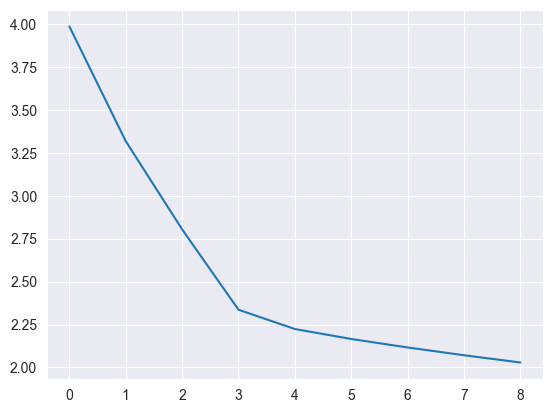


 ##################### 

Epoch: 10 	 Forwardpropagation finished.
Epoch 10 	 Loss: 1.9521326511926078.
Epoch 10 	 Accuracy: 0.9009266666666667
Epoch: 10 	 Backpropagation finished.
Epoche 10 finished.

 ##################### 

Epoch: 11 	 Forwardpropagation finished.
Epoch 11 	 Loss: 1.9166823820930836.
Epoch 11 	 Accuracy: 0.90186
Epoch: 11 	 Backpropagation finished.
Epoche 11 finished.

 ##################### 

Epoch: 12 	 Forwardpropagation finished.
Epoch 12 	 Loss: 1.8829125641459785.
Epoch 12 	 Accuracy: 0.9030833333333333
Epoch: 12 	 Backpropagation finished.
Epoche 12 finished.

 ##################### 

Epoch: 13 	 Forwardpropagation finished.
Epoch 13 	 Loss: 1.850624518088695.
Epoch 13 	 Accuracy: 0.9042466666666666
Epoch: 13 	 Backpropagation finished.
Epoche 13 finished.

 ##################### 

Epoch: 14 	 Forwardpropagation finished.
Epoch 14 	 Loss: 1.8196426892617354.
Epoch 14 	 Accuracy: 0.90533
Epoch: 14 	 Backpropagation finished.
Epoche 14 finished.

 ###########

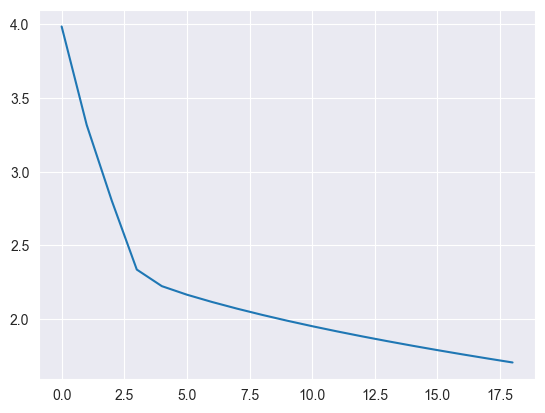


 ##################### 

Epoch: 20 	 Forwardpropagation finished.
Epoch 20 	 Loss: 1.6539436224363773.
Epoch 20 	 Accuracy: 0.9097533333333333
Epoch: 20 	 Backpropagation finished.
Epoche 20 finished.

 ##################### 

Epoch: 21 	 Forwardpropagation finished.
Epoch 21 	 Loss: 1.6289893575511734.
Epoch 21 	 Accuracy: 0.91026
Epoch: 21 	 Backpropagation finished.
Epoche 21 finished.

 ##################### 

Epoch: 22 	 Forwardpropagation finished.
Epoch 22 	 Loss: 1.6047078697827843.
Epoch 22 	 Accuracy: 0.910805
Epoch: 22 	 Backpropagation finished.
Epoche 22 finished.

 ##################### 

Epoch: 23 	 Forwardpropagation finished.
Epoch 23 	 Loss: 1.581082781599033.
Epoch 23 	 Accuracy: 0.911355
Epoch: 23 	 Backpropagation finished.
Epoche 23 finished.

 ##################### 

Epoch: 24 	 Forwardpropagation finished.
Epoch 24 	 Loss: 1.5580976386452627.
Epoch 24 	 Accuracy: 0.9117816666666667
Epoch: 24 	 Backpropagation finished.
Epoche 24 finished.

 ####################

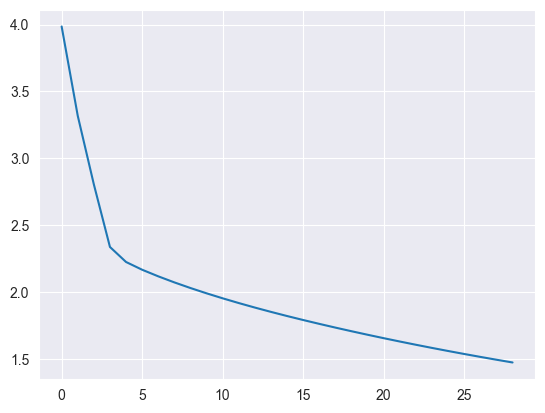


 ##################### 

Epoch: 30 	 Forwardpropagation finished.
Epoch 30 	 Loss: 1.4327038926818867.
Epoch 30 	 Accuracy: 0.91469
Epoch: 30 	 Backpropagation finished.
Epoche 30 finished.

 ##################### 

Epoch: 31 	 Forwardpropagation finished.
Epoch 31 	 Loss: 1.4137567971861702.
Epoch 31 	 Accuracy: 0.9152083333333333
Epoch: 31 	 Backpropagation finished.
Epoche 31 finished.

 ##################### 

Epoch: 32 	 Forwardpropagation finished.
Epoch 32 	 Loss: 1.3953372368468402.
Epoch 32 	 Accuracy: 0.9156983333333333
Epoch: 32 	 Backpropagation finished.
Epoche 32 finished.

 ##################### 

Epoch: 33 	 Forwardpropagation finished.
Epoch 33 	 Loss: 1.3774315043178567.
Epoch 33 	 Accuracy: 0.916345
Epoch: 33 	 Backpropagation finished.
Epoche 33 finished.

 ##################### 

Epoch: 34 	 Forwardpropagation finished.
Epoch 34 	 Loss: 1.360023025970701.
Epoch 34 	 Accuracy: 0.9169433333333333
Epoch: 34 	 Backpropagation finished.
Epoche 34 finished.

 ##########

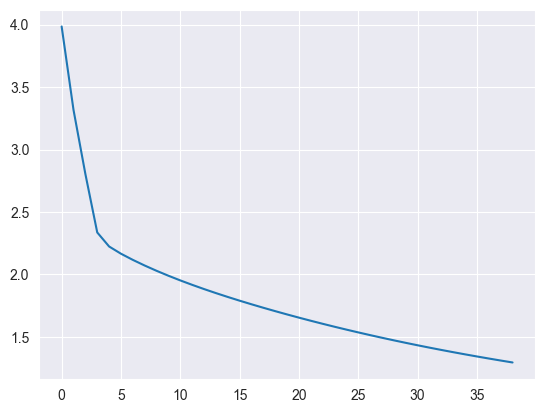


 ##################### 

Epoch: 40 	 Forwardpropagation finished.
Epoch 40 	 Loss: 1.2649781087840508.
Epoch 40 	 Accuracy: 0.9211816666666667
Epoch: 40 	 Backpropagation finished.
Epoche 40 finished.

 ##################### 

Epoch: 41 	 Forwardpropagation finished.
Epoch 41 	 Loss: 1.2505647521658272.
Epoch 41 	 Accuracy: 0.92189
Epoch: 41 	 Backpropagation finished.
Epoche 41 finished.

 ##################### 

Epoch: 42 	 Forwardpropagation finished.
Epoch 42 	 Loss: 1.236532522591703.
Epoch 42 	 Accuracy: 0.9226766666666667
Epoch: 42 	 Backpropagation finished.
Epoche 42 finished.

 ##################### 

Epoch: 43 	 Forwardpropagation finished.
Epoch 43 	 Loss: 1.2228682923308063.
Epoch 43 	 Accuracy: 0.9234483333333333
Epoch: 43 	 Backpropagation finished.
Epoche 43 finished.

 ##################### 

Epoch: 44 	 Forwardpropagation finished.
Epoch 44 	 Loss: 1.209559000981312.
Epoch 44 	 Accuracy: 0.9242466666666667
Epoch: 44 	 Backpropagation finished.
Epoche 44 finished.

 #

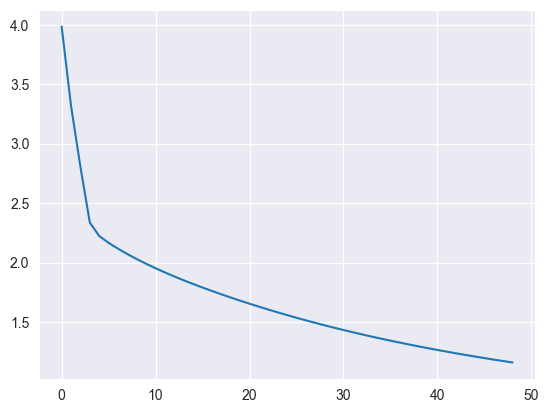

In [8]:
error_history = train_model.train(input_data=images_standardized, truth_data=labels_train, epoch=50, learning_rate=2, lam=0.1, abs_path="", graphics=True, prints = True, save_weights = False, model_name = '')

Now the model is trained and ready for use. We can classify the validation data.

In [9]:
classification_validation = nn_model.classification(images_validation_standardized)

/Users/juliusschneller/Desktop/Info_MA/Machine_Learning/final_project/gesture-classifier/src/machine_learning_framework/ActivationFunctions.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Lets see the confusion matrix.

/var/folders/bm/4knxzb094l5dm9kvls_3zs6r0000gn/T/ipykernel_6394/2244124033.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


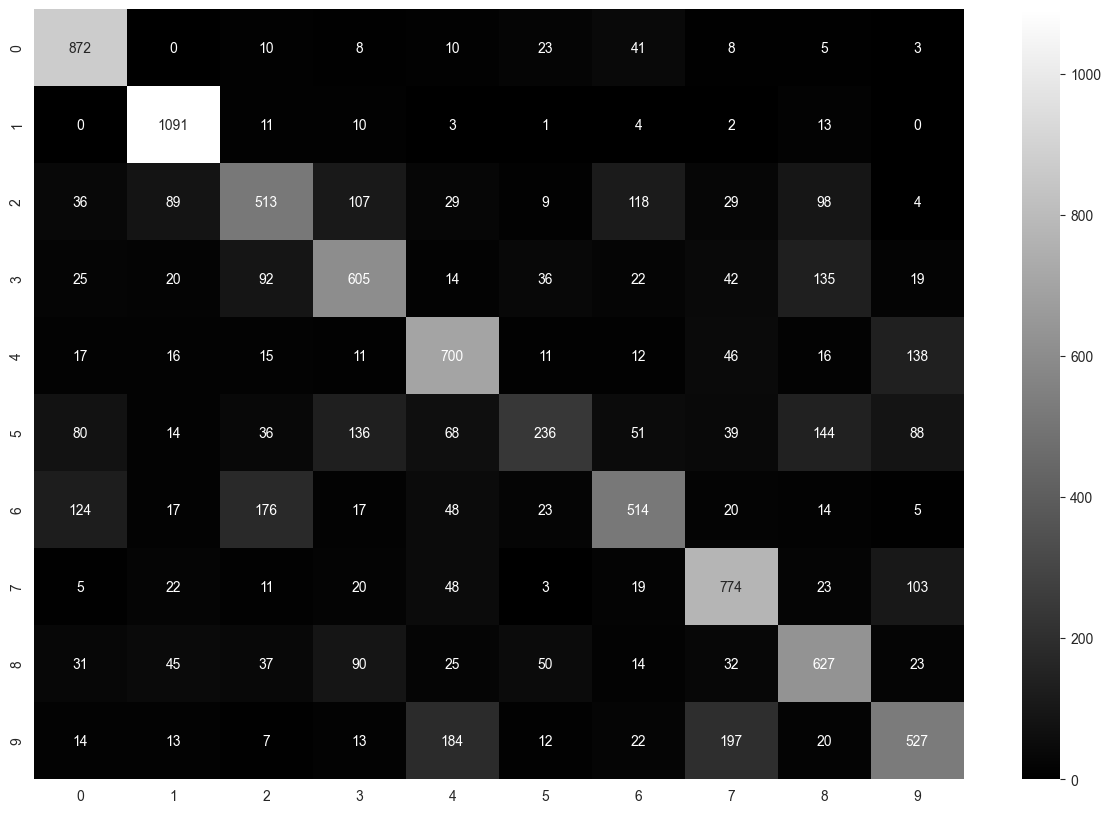

In [10]:
confusion = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        current_matrix = np.zeros(len(classification_validation))
        current_matrix[(classification_validation == j)&(labels_validation == i)]=1
        confusion[i][j] = np.sum(current_matrix)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(confusion,
            annot=True, # print pixel values onto each pixel
            fmt=".0f", # don't print decimals
            cmap="gray", # these are grayscale images, so "gray" is an appropriate colormap
            ax=ax # we have already initialised a matplotlib ax object we would like to use, so we provide it here
           );
fig.show()
sum = 0

Now let's look at some metrics.

In [11]:
print(f"Average accuracy is: {Metrics.macro_average_accuracy(classification_validation, labels_validation)}")
print(f"Per class accuracy is: {Metrics.accuracy_per_class(classification_validation, labels_validation)} \n")

print(f"Average f1 score is: {Metrics.f1_score_average(classification_validation, labels_validation)}")
print(f"Per class f1 score is: {Metrics.f1_score_per_class(classification_validation, labels_validation)}")

Average accuracy is: 0.6380026478321079
Per class accuracy is: [0.88979592 0.96123348 0.49709302 0.5990099  0.71283096 0.26457399
 0.53653445 0.75291829 0.64373717 0.52229931] 

Average f1 score is: 0.6270733817317128
Per class f1 score is: [0.7985348  0.88627132 0.52886598 0.59694129 0.6631928  0.36419753
 0.57915493 0.69824087 0.6060899  0.5492444 ]


If we would like to try out some different model sizes, iterations, learning_rates or lamdas we can run the hyperparameter testing method. The method writes the metrics of the given models in a textfile and returns the winners hyperparameters in form of a dictionary.

In [12]:
models = [[10, 10, 10], [20, 20, 10]]
#epochs = [50, 50]
epochs = [3, 3]
learning_rates = [1, 1]
lam = [0, 0.1]
abs_path = os.path.join(os.getcwd(), '')
winner = HyperparameterTesting.train_multiple_hyperparameters(images_standardized, labels_train, images_validation_standardized, labels_validation, models, epochs, learning_rates, lam, abs_path)
print(f"The winner is the model with hyperparameters: {winner}")

Models of test 1 created.

 ##################### 

Epoch: 0 	 Forwardpropagation finished.
Epoch 0 	 Loss: 2.4835178895421572.
Epoch 0 	 Accuracy: 0.9
Epoch: 0 	 Backpropagation finished.
Epoche 0 finished.

 ##################### 

Epoch: 1 	 Forwardpropagation finished.
Epoch 1 	 Loss: 2.3624189040427512.
Epoch 1 	 Accuracy: 0.9
Epoch: 1 	 Backpropagation finished.
Epoche 1 finished.

 ##################### 

Epoch: 2 	 Forwardpropagation finished.
Epoch 2 	 Loss: 2.314818891243966.
Epoch 2 	 Accuracy: 0.9
Epoch: 2 	 Backpropagation finished.
Epoche 2 finished.
Training of test 1 finished.


/Users/juliusschneller/Desktop/Info_MA/Machine_Learning/final_project/gesture-classifier/src/machine_learning_framework/ActivationFunctions.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Models of test 2 created.

 ##################### 

Epoch: 0 	 Forwardpropagation finished.
Epoch 0 	 Loss: 3.3704938539717286.
Epoch 0 	 Accuracy: 0.87818
Epoch: 0 	 Backpropagation finished.
Epoche 0 finished.

 ##################### 

Epoch: 1 	 Forwardpropagation finished.
Epoch 1 	 Loss: 2.711560335509976.
Epoch 1 	 Accuracy: 0.899785
Epoch: 1 	 Backpropagation finished.
Epoche 1 finished.

 ##################### 

Epoch: 2 	 Forwardpropagation finished.
Epoch 2 	 Loss: 2.4337386729394153.
Epoch 2 	 Accuracy: 0.9
Epoch: 2 	 Backpropagation finished.
Epoche 2 finished.
Training of test 2 finished.
The winner is the model with hyperparameters: {'layer': [20, 20, 10], 'epoch': 3, 'learning_rate': 1, 'lam': 0.1}


Another way to try out different hyperparameters we used is the randomised search. This function builds random combinations of the given hyperparameters and trains on them. Afterwards you can check the winner in the created textfile.

In [13]:
layer = [2, 3, 4]
neuron = [10, 20, 40, 80]
#epoch = [100, 200]
epoch = [3]
learning_rate = [0.1, 0.2, 0.4]
lam = [0.001, 0.01, 0.1]
abs_path = os.path.join(os.getcwd(), '')

HyperparameterTesting.randomized_search(images_standardized, labels_train, images_validation_standardized, labels_validation, layer, neuron, learning_rate, epoch, lam, 2, 10, abs_path)


Models of test 1 created.

 ##################### 

Epoch: 0 	 Forwardpropagation finished.
Epoch 0 	 Loss: 4.623122299925964.
Epoch 0 	 Accuracy: 0.820075
Epoch: 0 	 Backpropagation finished.
Epoche 0 finished.

 ##################### 

Epoch: 1 	 Forwardpropagation finished.
Epoch 1 	 Loss: 3.485241232170349.
Epoch 1 	 Accuracy: 0.846875
Epoch: 1 	 Backpropagation finished.
Epoche 1 finished.

 ##################### 

Epoch: 2 	 Forwardpropagation finished.
Epoch 2 	 Loss: 3.023840753442593.
Epoch 2 	 Accuracy: 0.88498
Epoch: 2 	 Backpropagation finished.
Epoche 2 finished.
Training of test 1 finished.
Models of test 2 created.

 ##################### 

Epoch: 0 	 Forwardpropagation finished.
Epoch 0 	 Loss: 2.9883627249862093.
Epoch 0 	 Accuracy: 0.8845216666666667
Epoch: 0 	 Backpropagation finished.
Epoche 0 finished.

 ##################### 

Epoch: 1 	 Forwardpropagation finished.
Epoch 1 	 Loss: 2.9563147992457077.
Epoch 1 	 Accuracy: 0.8861783333333333
Epoch: 1 	 Backpropagati